In [1231]:
## Import and read the raw data
import pandas as pd

data = pd.read_csv('bank-additional-full.csv', delimiter=';')
data.head()

# Description of fields in the raw data set
# age               numeric
# job               categorical
# marital           categorical
# education         categorical
# default           categorical
# housing           categorical
# loan              categorical
# contact           categorical
# month             categorical
# day               categorical
# duration          numeric
# campaign          numeric
# pdays             numeric
# previous          numeric
# poutcome          categorical
# emp.var.rate      numeric
# cons.price.idx    numeric
# cons.conf.idx     numeric
# euribor3m         numeric
# nr.employed       numeric

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [1221]:
import numpy as np
# Encode the desired target ("y") to a binary representation
from sklearn.preprocessing import OrdinalEncoder

def encode_to_ordinal(array):
    ordinal_encoder = OrdinalEncoder(dtype=np.int)
    return ordinal_encoder.fit_transform(array.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
y_encoded = encode_to_ordinal(data.y.values)


In [1222]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding for categorical features
one_hot_encoder = OneHotEncoder(dtype=np.int, sparse=True)

# start assembling cleaned data
# clean_data = pd.DataFrame(one_hot_encoder.fit_transform(data[['job', 'marital','education','default','housing','loan','contact','month','day_of_week','poutcome']]).toarray())
clean_data = pd.DataFrame(one_hot_encoder.fit_transform(data[['education','default','contact','poutcome']]).toarray())



In [1223]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Perform feature scaling on numerical values
clean_data['age'] = scaler.fit_transform(data[['age']])
clean_data['campaign'] = scaler.fit_transform(data[['campaign']])
clean_data['pdays'] = standard_scaler.fit_transform(data[['pdays']])
clean_data['previous'] = scaler.fit_transform(data[['previous']])
clean_data['emp.var.rate'] = scaler.fit_transform(data[['emp.var.rate']])
clean_data['cons.price.idx'] = scaler.fit_transform(data[['cons.price.idx']])
clean_data['cons.conf.idx'] = scaler.fit_transform(data[['cons.conf.idx']])
clean_data['euribor3m'] = scaler.fit_transform(data[['euribor3m']])
clean_data['nr.employed'] = scaler.fit_transform(data[['nr.employed']])
clean_data['y'] = y_encoded

In [1224]:
## Generate histograms for numerical features in processed data
import matplotlib.pyplot as plt

%matplotlib inline

histogram_columns = clean_data[['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']]
histogram_columns.hist(bins=50, figsize=(20,15))

In [1225]:
# Split training and test sets
from sklearn.model_selection import train_test_split

X = clean_data.loc[:, clean_data.columns != 'y']
y = clean_data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


In [1226]:
import tensorflow as tf



# Build and compile TF model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu', input_dim=len(X_train.columns)),
    
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])


In [1227]:

# es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train, epochs=40, validation_data=(X_test, y_test), shuffle=True, batch_size=256)

Epoch 1/40
108/108 [==============================] - 1s 4ms/step - loss: 0.4164 - accuracy: 0.8892 - val_loss: 0.2992 - val_accuracy: 0.8928
Epoch 2/40
108/108 [==============================] - 0s 3ms/step - loss: 0.3070 - accuracy: 0.8908 - val_loss: 0.2831 - val_accuracy: 0.9040
Epoch 3/40
108/108 [==============================] - 0s 3ms/step - loss: 0.3027 - accuracy: 0.8939 - val_loss: 0.2799 - val_accuracy: 0.9042
Epoch 4/40
108/108 [==============================] - 0s 3ms/step - loss: 0.2978 - accuracy: 0.8957 - val_loss: 0.2782 - val_accuracy: 0.9044
Epoch 5/40
108/108 [==============================] - 0s 3ms/step - loss: 0.2966 - accuracy: 0.8948 - val_loss: 0.2773 - val_accuracy: 0.9037
Epoch 6/40
108/108 [==============================] - 0s 3ms/step - loss: 0.2924 - accuracy: 0.8960 - val_loss: 0.2757 - val_accuracy: 0.9043
Epoch 7/40
108/108 [==============================] - 0s 3ms/step - loss: 0.2974 - accuracy: 0.8932 - val_loss: 0.2768 - val_accuracy: 0.9038
Epoch 

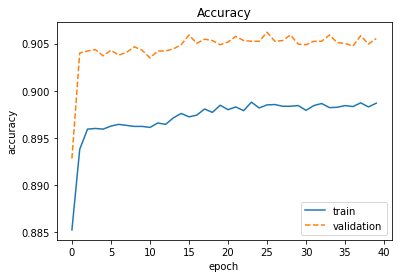

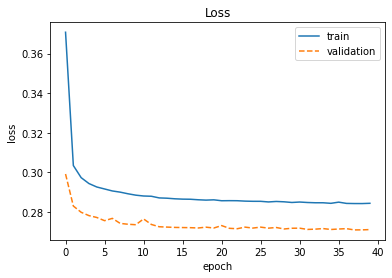

In [1228]:
# Plot model accuracy and loss for training and validation

#  "Accuracy"
plt.plot(history.history['accuracy'], )
plt.plot(history.history['val_accuracy'], '--')
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], '--')
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [1229]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Model accuracy =', test_acc)

425/425 [==============================] - 1s 1ms/step - loss: 0.2712 - accuracy: 0.9055
Model accuracy = 0.9055396318435669


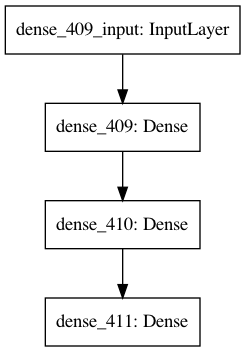

In [1230]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')